In [1]:
import sys
sys.path.append("./../")
from bezier_curve.algo_section import *
from bezier_curve.utils import *
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

In [2]:
bc = BezierCurve()

start_time = time.time()

white_canvas = np.ones((300, 500, 3), np.int32) * 255
points = ((100, 50), (200, 150), (125, 100), (75, 200))
canvas = white_canvas.copy()

In [3]:
def draw_triple_points(points, canvas):
    for point in points:
        canvas = cv2.circle(canvas, point, 3, (0, 0, 0), -1)
    return canvas

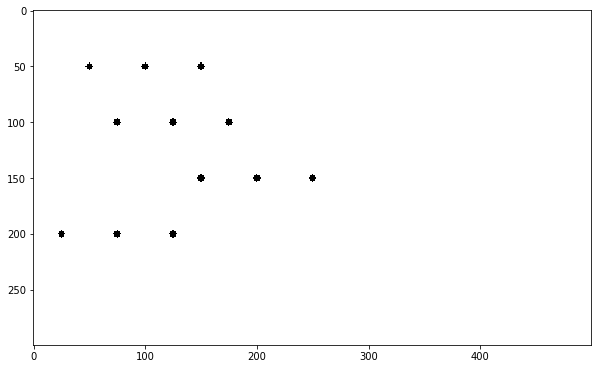

In [4]:
for point in points:
    left_support, right_support = bc.add_point(point)
    draw_triple_points([left_support, point, right_support], canvas)
plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

(100, 50)
(1001, 2)
(200, 150)
(1001, 2)
(125, 100)
(1001, 2)
3


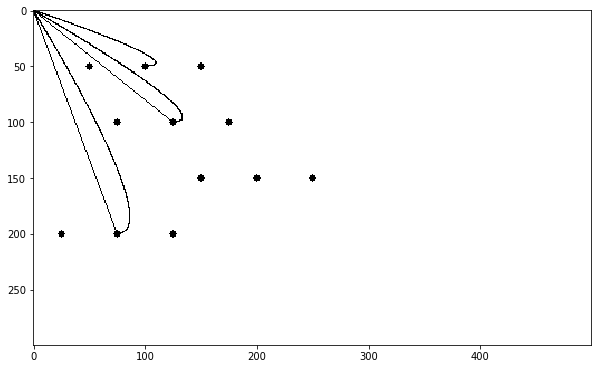

In [5]:
line, last_line = bc.get_line()
canvas = cv2.polylines(canvas.astype(np.int32), [last_line.astype(np.int32)], 0, (0, 0, 0))
canvas = cv2.polylines(canvas.astype(np.int32), [line.astype(np.int32)], 0, (0, 0, 0))
plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

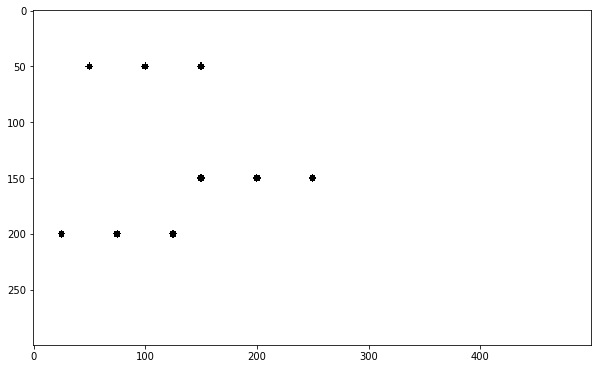

In [6]:
bc.delete_point(2)
canvas = white_canvas.copy()

for point in bc.points():
    left = point.left_support_point()
    right = point.right_support_point()
    p = point.position()
    draw_triple_points([left, p, right], canvas)

plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

In [7]:
canvas = cv2.polylines(canvas.astype(np.int32), [bc.get_line().astype(np.int32)], 0, (0, 0, 0))
plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

(100, 50)
(1001, 2)
(200, 150)
(1001, 2)
2


AttributeError: 'tuple' object has no attribute 'astype'

In [ ]:
bc.add_point((400, 400))
bc.update_point(3, (350, 100))

canvas = white_canvas.copy()

for point in bc.points():
    left = point.left_support_point()
    right = point.right_support_point()
    p = point.position()
    draw_triple_points([left, p, right], canvas)

plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

In [ ]:
canvas = cv2.polylines(canvas.astype(np.int32), [bc.get_line().astype(np.int32)], 0, (0, 0, 0))
plt.figure(figsize=(10, 10))
plt.imshow(canvas, cmap="gray")

In [ ]:
print("Elapsed time:\n ------ {} ------".format(time.time() - start_time))